# Fase (1): Importação do conjunto de dados pelo "sklearn.datasets"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [3]:
print(load_breast_cancer().DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
X = pd.DataFrame(data=load_breast_cancer().data, columns=load_breast_cancer().feature_names)
y = pd.Series(data=load_breast_cancer().target, name='class')

In [5]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
y.value_counts()

class
1    357
0    212
Name: count, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=.3,
                                                   random_state=10)

In [10]:
X_train.shape, X_test.shape

((398, 30), (171, 30))

In [11]:
y_test.value_counts()

class
1    112
0     59
Name: count, dtype: int64

# Fase (2): Análise da importância das características

### Feature importance da Floresta Aleatória

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Treinando o modelo

rf = RandomForestClassifier(random_state=10, n_estimators=50)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=10)

In [14]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(1.0, 0.9824561403508771)

In [15]:
rf.feature_importances_

array([0.0657571 , 0.01222226, 0.0096359 , 0.0615246 , 0.00864832,
       0.00478136, 0.04545289, 0.06979726, 0.00385216, 0.00471265,
       0.00652761, 0.00751338, 0.01500033, 0.02169235, 0.00316254,
       0.00321495, 0.01192053, 0.00277368, 0.00620794, 0.00457305,
       0.11908535, 0.01479792, 0.08149759, 0.13926677, 0.01708682,
       0.02510111, 0.02004107, 0.19851563, 0.00327115, 0.01236574])

In [16]:
rf.feature_names_in_

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype=object)

In [17]:
# Criando um dataframe para organizar os resultados

ranking = pd.DataFrame({'Atributo': rf.feature_names_in_,
                       'Valor RF': rf.feature_importances_})

In [19]:
df_rank = ranking.sort_values(by='Valor RF', ascending=False).head(10)

In [20]:
df_rank

,Atributo,Valor RF
27,worst concave points,0.198516
23,worst area,0.139267
20,worst radius,0.119085
22,worst perimeter,0.081498
7,mean concave points,0.069797
0,mean radius,0.065757
3,mean area,0.061525
6,mean concavity,0.045453
25,worst compactness,0.025101
13,area error,0.021692


C:\Users\bruno\AppData\Local\Temp\ipykernel_12916\3813733606.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_rank, x='Atributo', y='Valor RF', palette='mako')


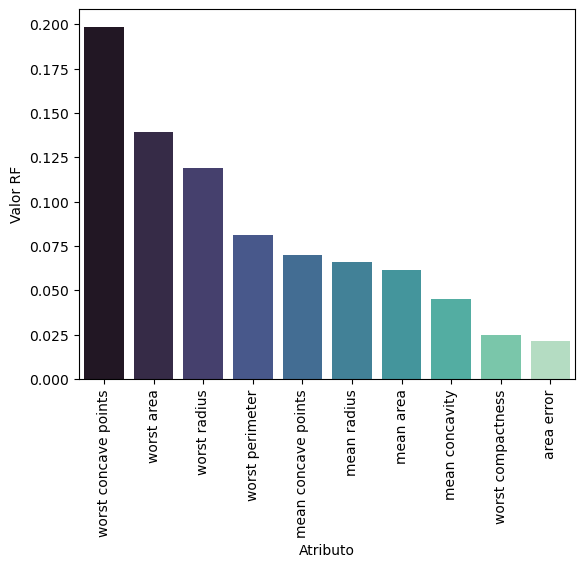

In [22]:
sns.barplot(data=df_rank, x='Atributo', y='Valor RF', palette='mako')
plt.xticks(rotation=90)
plt.show()

### Permutation Importance

In [23]:
from sklearn.inspection import permutation_importance

In [24]:
# vamos repetir por 50 vezes a nossa análise de cada variável

pi = permutation_importance(estimator=rf,
                           X=X_test,
                           y=y_test,
                           random_state=10,
                           scoring='accuracy',
                           n_repeats=50)

In [27]:
pi.importances_mean

array([0.00292398, 0.00081871, 0.00233918, 0.00760234, 0.        ,
       0.        , 0.        , 0.00912281, 0.        , 0.00315789,
       0.        , 0.        , 0.00035088, 0.00105263, 0.        ,
       0.00526316, 0.00888889, 0.        , 0.00409357, 0.00573099,
       0.00877193, 0.00327485, 0.00327485, 0.01426901, 0.00233918,
       0.00409357, 0.00269006, 0.02105263, 0.        , 0.        ])

In [28]:
pi.importances_std

array([0.00292398, 0.00202916, 0.0028649 , 0.00441511, 0.        ,
       0.        , 0.        , 0.00511955, 0.        , 0.0029146 ,
       0.        , 0.        , 0.00138881, 0.00224671, 0.        ,
       0.00175439, 0.00292164, 0.        , 0.00267987, 0.00081871,
       0.0045674 , 0.00312961, 0.00334102, 0.00673505, 0.0028649 ,
       0.00267987, 0.0029146 , 0.00835255, 0.        , 0.        ])

In [29]:
# Vamos anexar estas informações junto ao dataframe ranking

ranking['Valor PI'] = pi.importances_mean

In [31]:
df_rank_2 = ranking.sort_values(by='Valor PI', ascending=False).head(10)

In [32]:
df_rank_2

,Atributo,Valor RF,Valor PI
27,worst concave points,0.198516,0.021053
23,worst area,0.139267,0.014269
7,mean concave points,0.069797,0.009123
16,concavity error,0.011921,0.008889
20,worst radius,0.119085,0.008772
3,mean area,0.061525,0.007602
19,fractal dimension error,0.004573,0.005731
15,compactness error,0.003215,0.005263
25,worst compactness,0.025101,0.004094
18,symmetry error,0.006208,0.004094


C:\Users\bruno\AppData\Local\Temp\ipykernel_12916\1350691566.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_rank_2, x='Atributo', y='Valor PI', palette='mako')


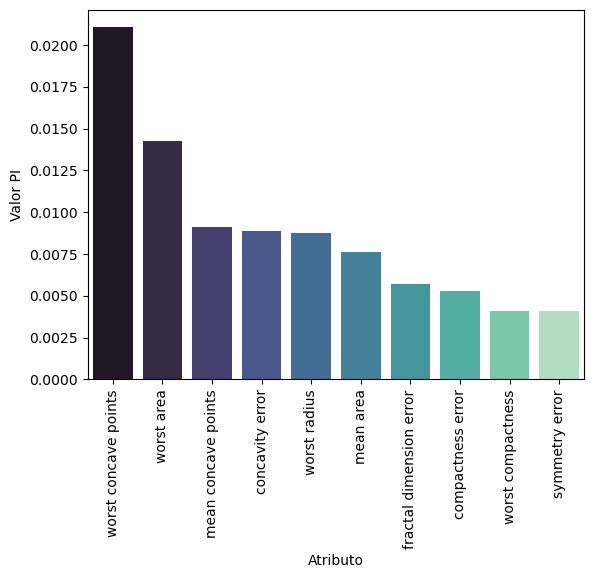

In [33]:
sns.barplot(data=df_rank_2, x='Atributo', y='Valor PI', palette='mako')
plt.xticks(rotation=90)
plt.show()

### SHAP

In [34]:
# Uma vez que já treinamos a Floresta Aleatória, podemos já usar o SHAP
import shap

In [35]:
# Vamos usar a função "Explainer"
# Aqui vamos usar também o X_test (generalização da análise da importância das variáveis)

explainer = shap.Explainer(rf)
shap_values = explainer(X_test)

In [36]:
shap_values.shape

(171, 30, 2)

In [38]:
shap_values[0]

.values =
array([[ 2.94156157e-02, -2.94156157e-02],
       [-6.63136327e-02,  6.63136327e-02],
       [ 1.85015978e-03, -1.85015978e-03],
       [ 4.03126812e-02, -4.03126812e-02],
       [ 3.16839971e-03, -3.16839971e-03],
       [ 4.64540389e-04, -4.64540389e-04],
       [ 2.42052900e-02, -2.42052900e-02],
       [ 4.60984018e-02, -4.60984018e-02],
       [-2.38204987e-04,  2.38204987e-04],
       [-5.69172587e-04,  5.69172587e-04],
       [ 2.33417532e-03, -2.33417532e-03],
       [-8.64388549e-04,  8.64388549e-04],
       [-5.63971799e-04,  5.63971799e-04],
       [ 6.87319914e-03, -6.87319914e-03],
       [ 9.94680505e-05, -9.94680505e-05],
       [ 3.56350833e-04, -3.56350833e-04],
       [ 4.27706477e-03, -4.27706477e-03],
       [ 4.03158298e-05, -4.03158298e-05],
       [ 6.96465047e-04, -6.96465047e-04],
       [ 2.43442367e-03, -2.43442367e-03],
       [ 7.32739910e-02, -7.32739910e-02],
       [-3.01547406e-02,  3.01547406e-02],
       [ 6.66147306e-02, -6.66147306e-02],
 

In [39]:
rf.classes_

array([0, 1])

In [40]:
# Índice matriz: [índice amostra, todos os dados desta amostra, classe de interesse]
# Nossa classe de interesse é a 0 (0 = maligno)

shap_values[0, :, 0]

.values =
array([ 2.94156157e-02, -6.63136327e-02,  1.85015978e-03,  4.03126812e-02,
        3.16839971e-03,  4.64540389e-04,  2.42052900e-02,  4.60984018e-02,
       -2.38204987e-04, -5.69172587e-04,  2.33417532e-03, -8.64388549e-04,
       -5.63971799e-04,  6.87319914e-03,  9.94680505e-05,  3.56350833e-04,
        4.27706477e-03,  4.03158298e-05,  6.96465047e-04,  2.43442367e-03,
        7.32739910e-02, -3.01547406e-02,  6.66147306e-02,  9.14768896e-02,
        7.44265276e-03,  1.47264655e-02,  2.97459123e-02,  1.26439171e-01,
       -3.60719151e-05,  2.07221157e-03])

.base_values =
np.float64(0.3843216080402011)

.data =
array([1.546e+01, 1.189e+01, 1.025e+02, 7.369e+02, 1.257e-01, 1.555e-01,
       2.032e-01, 1.097e-01, 1.966e-01, 7.069e-02, 4.209e-01, 6.583e-01,
       2.805e+00, 4.464e+01, 5.393e-03, 2.321e-02, 4.303e-02, 1.320e-02,
       1.792e-02, 4.168e-03, 1.879e+01, 1.704e+01, 1.250e+02, 1.102e+03,
       1.531e-01, 3.583e-01, 5.830e-01, 1.827e-01, 3.216e-01, 1.010e-01])

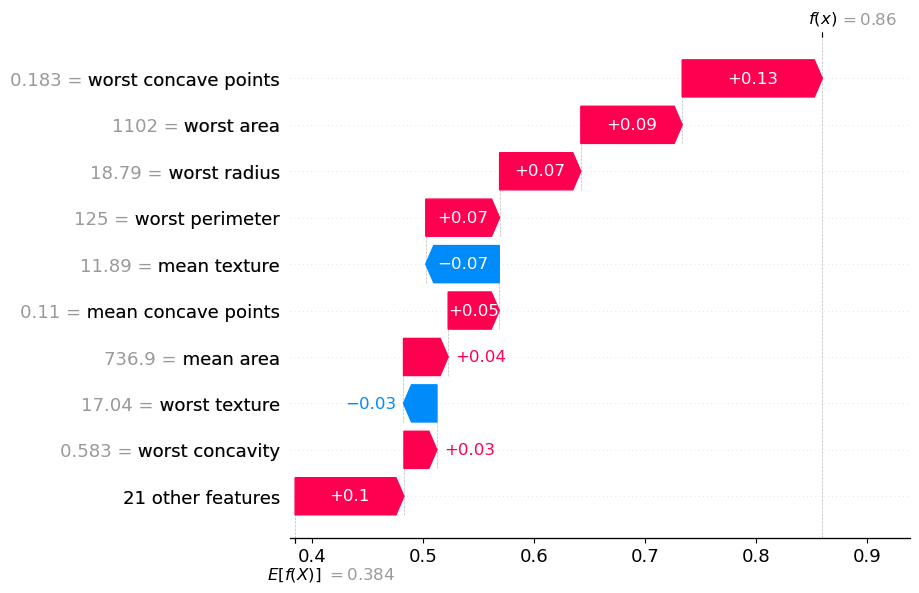

In [44]:
# Análise individual da primeira instância. Precisamosacessar ela, todos os atributos e usar a classe de referência
shap.plots.waterfall(shap_values=shap_values[0, :, 0])

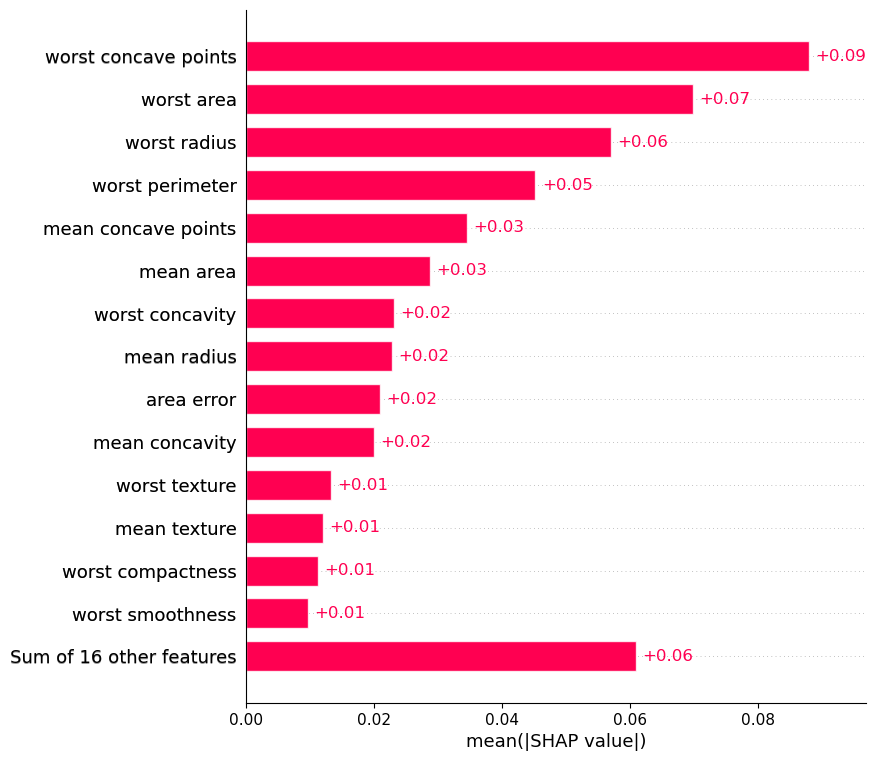

In [46]:
# Análise global: mean SHAP
# Percebam que o primiero ídice agora é ":", para usar todas as instâncias.
shap.plots.bar(shap_values=shap_values[:, :, 0], max_display=15)

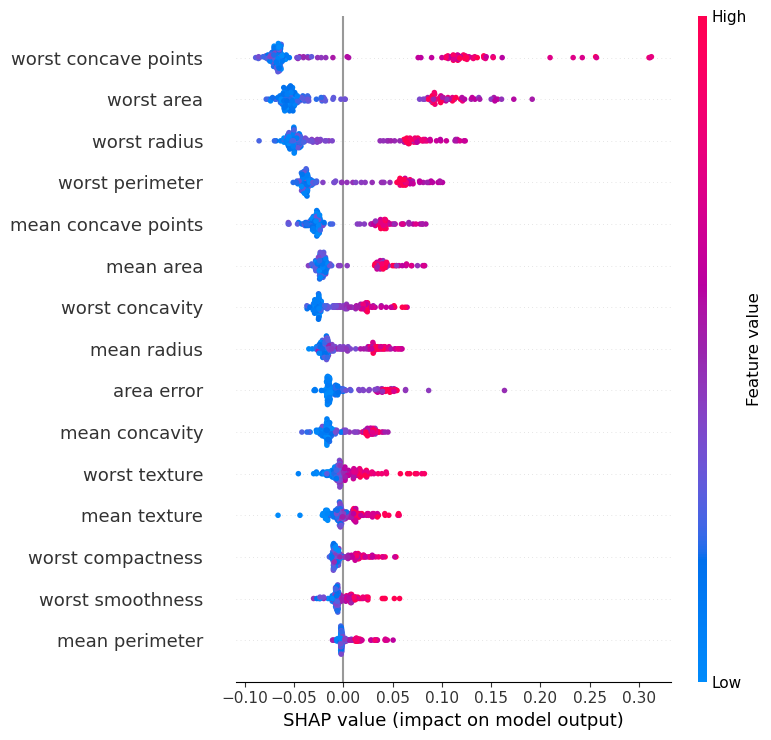

In [47]:
# Análise global: beeswarm
shap.summary_plot(shap_values=shap_values[:, :, 0], max_display=15)